In [1]:
import pandas as pd

# Problem Statement 13

In [2]:
gov_hospital_data = pd.read_csv("C:/Users/Shrii/Documents/Internship Program/Reference Material/Jain Internship Project/DS - Python + SQL + ETL - Healthcare Census/Data/government_hospitals.csv")
gov_hospital_data.head()

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016


In [3]:
gov_hospital_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

gov_hospital_data = gov_hospital_data.iloc[1:]

gov_hospital_data.reset_index(drop=True, inplace=True)

In [4]:
gov_hospital_data.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


In [5]:
gov_hospital_data.drop(0,inplace=True)

In [6]:
gov_hospital_data['Last_Updated'] = pd.to_datetime(gov_hospital_data['Last_Updated'], format='%d.%m.%Y')

gov_hospital_data['Last_Updated'] = gov_hospital_data['Last_Updated'].dt.strftime('%Y-%m-%d')

In [8]:
def state_names(data):
    
    state_mapping = {
        'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
        'Jammu & Kashmir':'Jammu and Kashmir',
        'Daman & Diu':'Daman and Diu',
        'Arunachal Pradesh*':'Arunachal Pradesh',
        'Andaman & Nicobar Islands':'Andaman and Nicobar Islands',
    }

    data['State/UT'] = data['State/UT'].map(state_mapping).fillna(data['State/UT'])
    return data


gov_hospital_data = state_names(gov_hospital_data)
gov_hospital_data.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Arunachal Pradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
5,Goa*,17,1405,25,1608,2017-12-31


# Problem Statement 14


In [9]:
import os
clean_data_folder = "Clean_Data"
if not os.path.exists(clean_data_folder):
    os.makedirs(clean_data_folder)

gov_hospital_data.to_csv(os.path.join(clean_data_folder, "governament_hospital.csv"), index=False)
print("Processed hospital data saved to 'all_hospitals.csv' in the '{}' folder.".format(clean_data_folder))


Processed hospital data saved to 'all_hospitals.csv' in the 'Clean_Data' folder.


# Problem Statement 15

In [10]:
census_data = pd.read_csv('C:/Users/Shrii/Documents/GitHub/ETA-Analysis/Clean_data/census.csv')
hospital_data = pd.read_csv("C:/Users/Shrii/Documents/GitHub/ETA-Analysis/Clean_data/governament_hospital.csv")

In [11]:
hospital_data['State/UT']= hospital_data['State/UT'].str.rstrip('*')

In [12]:
census_data.dropna(subset=['Population'],inplace=True)
states_population = census_data.groupby('State/UT')['Population'].sum()


In [13]:
merged_data = pd.merge(hospital_data[['State/UT','Rural_Government_Hospitals','Rural_Government_Beds','Urban_Government_Hospitals','Urban_Government_Beds','Last_Updated']],states_population,on='State/UT')
hospital_data['Total_No_of_Beds_in_State'] = hospital_data['Rural_Government_Beds'] + hospital_data['Urban_Government_Beds']
hospital_data['Beds_Per_Capita']=hospital_data['Total_No_of_Beds_in_State'] / census_data['Population']

In [14]:
sorted_data = hospital_data.sort_values(by='Beds_Per_Capita')
sorted_data['Total_No_of_Governament_Hospitals'] = hospital_data['Rural_Government_Hospitals'] + hospital_data['Urban_Government_Hospitals']

top_3_states_with_least_beds = hospital_data[['State/UT', 'Beds_Per_Capita']].nsmallest(3, 'Beds_Per_Capita')

In [15]:
print("Three States/Union Territories with the least amount of beds for their population:\n",top_3_states_with_least_beds)

Three States/Union Territories with the least amount of beds for their population:
                 State/UT  Beds_Per_Capita
31         Daman and Diu         0.000453
30  Dadra & Nagar Haveli         0.001015
34            Puducherry         0.001553


# Problem statement 16

In [16]:
import matplotlib.pyplot as plt

In [17]:
expected_beds = merged_data['Population'] / 1000 * 3
merged_data['Total_beds_in_states'] = merged_data['Rural_Government_Beds'] + merged_data['Urban_Government_Beds']
beds_gap = expected_beds - merged_data['Total_beds_in_states']

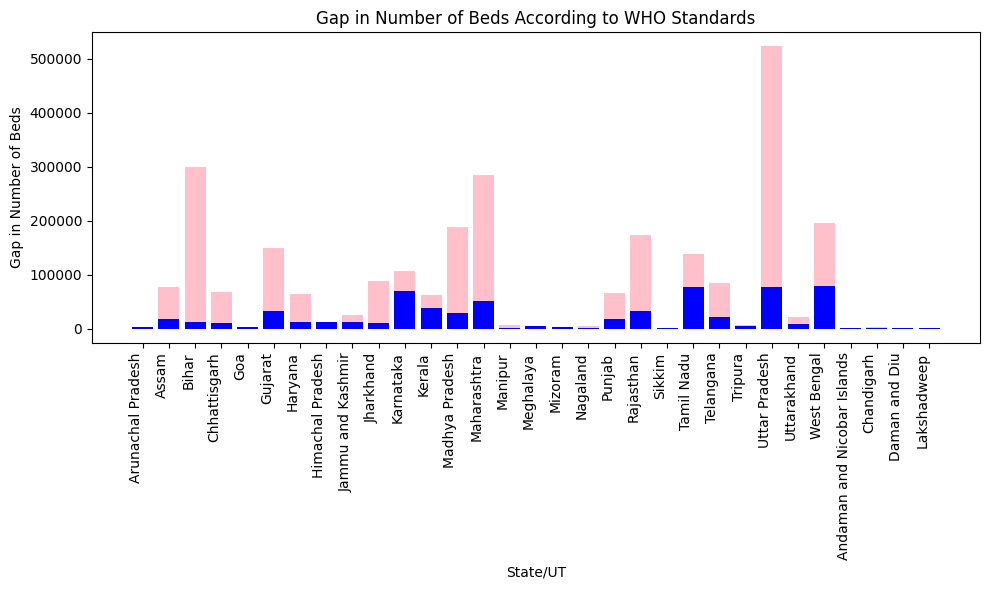

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['State/UT'], beds_gap , color='pink')
plt.bar(merged_data['State/UT'], merged_data['Total_beds_in_states'] , color='blue')
plt.xlabel('State/UT')
plt.ylabel('Gap in Number of Beds')
plt.title('Gap in Number of Beds According to WHO Standards')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Problem Statement 17

In [19]:
merged_data['Total_govt_hospitals']=merged_data['Rural_Government_Hospitals'] + merged_data['Urban_Government_Hospitals']
beds_gap = expected_beds - merged_data['Total_beds_in_states']

average_beds = merged_data['Total_beds_in_states'].sum() / merged_data['Total_govt_hospitals'].sum()

Hospitals_Required = (beds_gap / average_beds).round()

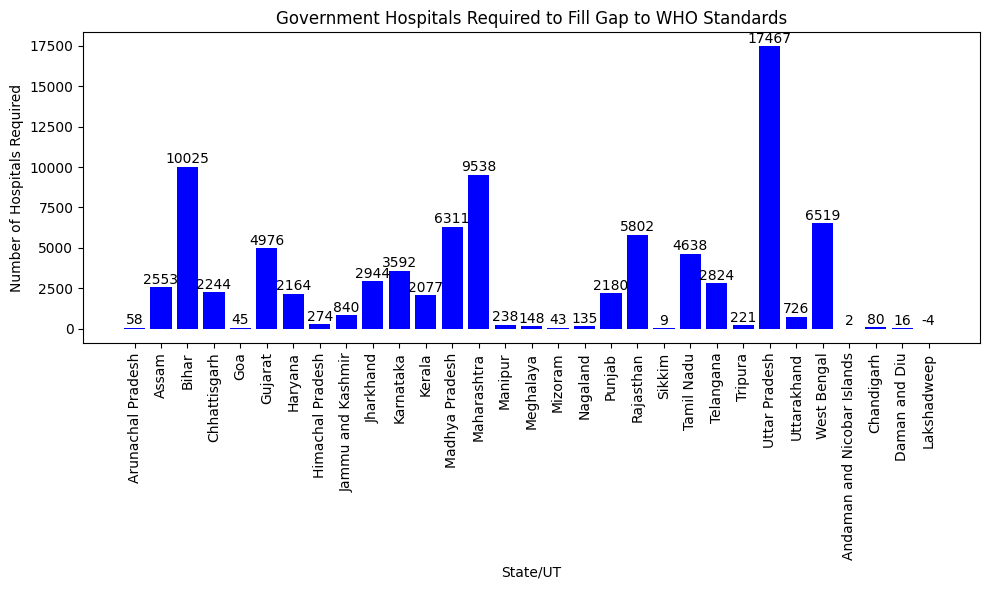

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['State/UT'],Hospitals_Required, color='orange')
bars=plt.bar(merged_data['State/UT'],Hospitals_Required,color='blue')
for bar,value in zip(bars,Hospitals_Required):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+25, str(int(value)),ha='center',va='bottom',color='black')
plt.title('Government Hospitals Required to Fill Gap to WHO Standards')
plt.xlabel('State/UT')
plt.ylabel('Number of Hospitals Required')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()